In [1]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(repr)
library(ComplexHeatmap)
library(tidyverse)
library(circlize)

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


Loading required package: grid

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.5     ✔ forcats 0.5.2
✔ pur

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome/'

In [3]:
demux_hex = c('#FF3004', '#00A931', '#033B91', '#748705','#664110',
            '#F98502', '#48D571', '#376BBB', '#A0B341', '#6A6C62')

gex_hex = c('#FF3004', '#00A931', '#033B91', '#748705', '#664110',
            '#F98502', '#48D571', '#376BBB', '#A0B341')

atac_hex = c('#FF3004', '#00A931', '#033B91', '#748705',
            '#F98502', '#48D571', '#376BBB', '#A0B341', '#6A6C62')

In [4]:
merged_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos', 'scavengers')
names(demux_hex) <- merged_order

In [5]:
gex_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos')

atac_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',
               'freemuxlet', 'vireo_nogenos', 'souporcell_nogenos', 'scsplit_nogenos', 'scavengers')

gex_geno <- c(rep('geno_based', 5), rep('geno_free', 4))
atac_geno <- c(rep('geno_based', 4), rep('geno_free', 5))

col_names <- c('method', 'geno_type')

gex_methods <- as.data.frame(gex_order)
gex_methods$geno_type <- gex_geno
colnames(gex_methods) <- col_names

atac_methods <- as.data.frame(atac_order)
atac_methods$geno_type <- atac_geno
colnames(atac_methods) <- col_names

In [6]:
doub_gex_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_gex_drop_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

doub_atac_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_atac_drop_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_gex_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_gex_drop_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_atac_drop <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_atac_drop_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)


In [7]:
head(doub_gex_drop)

,method,doub_prop,value
,<chr>,<int>,<dbl>
0,demuxlet,0,0.9104623
1,freemuxlet,0,0.9967496
2,vireo,0,0.9607734
3,vireo_nogenos,0,0.9778309
4,souporcell,0,0.9978609
5,souporcell_nogenos,0,0.9973330


In [8]:
doub_gex_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_gex_donor_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

doub_atac_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/doub_atac_donor_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_gex_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_gex_donor_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

mux_atac_donor <- read.table(paste0(projdir, 'csv/final_figures/figure2/mux_atac_donor_var_mean.csv.gz'),
                          sep='\t', header=1, row.names=1)

In [19]:
head(mux_gex_drop)

,method,n_donors,value,method_class
,<fct>,<int>,<dbl>,<chr>
0,demuxlet,2,0.9606623,Genotype-based
1,freemuxlet,2,0.9740249,Genotype-free
2,vireo,2,0.9875820,Genotype-based
3,vireo_nogenos,2,0.9925825,Genotype-free
4,souporcell,2,0.9978053,Genotype-based
5,souporcell_nogenos,2,0.9974997,Genotype-free


In [10]:
head(doub_gex_donor)

,method,doub_prop,value
,<chr>,<int>,<dbl>
0,demuxlet,0,0.9997214
1,freemuxlet,0,0.5019997
2,vireo,0,1.0000000
3,vireo_nogenos,0,1.0000000
4,souporcell,0,1.0000000
5,souporcell_nogenos,0,1.0000000


In [11]:
renamed_hex <- demux_hex
tmp_order <- c('demuxlet', 'vireo', 'souporcell', 'scsplit',  'demuxalot',
               'freemuxlet', 'vireo, no genotypes', 'souporcell, no genotypes',
                  'scsplit, no genotypes', 'scavengers')
names(renamed_hex) <- tmp_order

merged_pd_drop <- rbind(doub_gex_drop, doub_atac_drop)
merged_pd_drop$var_renamed <- gsub('_nogenos', ', no genotypes', merged_pd_drop$method)
merged_pd_drop$var_renamed <- factor(merged_pd_drop$var_renamed, levels = tmp_order)

In [12]:
method_classes <- c(rep('Genotype-based', 5), rep('Genotype-free', 5))
method_classes

[1] "Genotype-based" "Genotype-based" "Genotype-based" "Genotype-based"
 [5] "Genotype-based" "Genotype-free"  "Genotype-free"  "Genotype-free" 
 [9] "Genotype-free"  "Genotype-free"

In [13]:
class_dict <- setNames(method_classes, merged_order)

In [14]:
class_dict

demuxlet              vireo         souporcell            scsplit 
  "Genotype-based"   "Genotype-based"   "Genotype-based"   "Genotype-based" 
         demuxalot         freemuxlet      vireo_nogenos souporcell_nogenos 
  "Genotype-based"    "Genotype-free"    "Genotype-free"    "Genotype-free" 
   scsplit_nogenos         scavengers 
   "Genotype-free"    "Genotype-free"

In [15]:
merged_pd_drop$method_class <- class_dict[merged_pd_drop$method]
head(merged_pd_drop)

,method,doub_prop,value,var_renamed,method_class
,<chr>,<int>,<dbl>,<fct>,<chr>
0,demuxlet,0,0.9104623,demuxlet,Genotype-based
1,freemuxlet,0,0.9967496,freemuxlet,Genotype-free
2,vireo,0,0.9607734,vireo,Genotype-based
3,vireo_nogenos,0,0.9778309,"vireo, no genotypes",Genotype-free
4,souporcell,0,0.9978609,souporcell,Genotype-based
5,souporcell_nogenos,0,0.9973330,"souporcell, no genotypes",Genotype-free


In [16]:
# doub_gex_drop$method_class <- class_dict[doub_gex_drop$method]
# doub_atac_drop$method_class <- class_dict[doub_atac_drop$method]
# mux_gex_drop$method_class <- class_dict[mux_gex_drop$method]
# mux_atac_drop$method_class <- class_dict[mux_atac_drop$method]

# doub_gex_donor$method_class <- class_dict[doub_gex_donor$method]
# doub_atac_donor$method_class <- class_dict[doub_atac_donor$method]
# mux_gex_donor$method_class <- class_dict[mux_gex_donor$method]
# mux_atac_donor$method_class <- class_dict[mux_atac_donor$method]

In [26]:
doub_gex_drop$method_class <- class_dict[doub_gex_drop$method[match(doub_gex_drop$method, names(class_dict))]]
doub_atac_drop$method_class <- class_dict[doub_atac_drop$method[match(doub_atac_drop$method, names(class_dict))]]
mux_gex_drop$method_class <- class_dict[mux_gex_drop$method[match(mux_gex_drop$method, names(class_dict))]]
mux_atac_drop$method_class <- class_dict[mux_atac_drop$method[match(mux_atac_drop$method, names(class_dict))]]

doub_gex_donor$method_class <- class_dict[doub_gex_donor$method[match(doub_gex_donor$method, names(class_dict))]]
doub_atac_donor$method_class <- class_dict[doub_atac_donor$method[match(doub_atac_donor$method, names(class_dict))]]
mux_gex_donor$method_class <- class_dict[mux_gex_donor$method[match(mux_gex_donor$method, names(class_dict))]]
mux_atac_donor$method_class <- class_dict[mux_atac_donor$method[match(mux_atac_donor$method, names(class_dict))]]

In [27]:
head(doub_gex_drop)

,method,doub_prop,value,method_class
,<fct>,<int>,<dbl>,<chr>
0,demuxlet,0,0.9104623,Genotype-based
1,freemuxlet,0,0.9967496,Genotype-free
2,vireo,0,0.9607734,Genotype-free
3,vireo_nogenos,0,0.9778309,Genotype-based
4,souporcell,0,0.9978609,Genotype-based
5,souporcell_nogenos,0,0.9973330,Genotype-free


In [30]:
doub_gex_drop$method <- factor(doub_gex_drop$method, levels = gex_order)
doub_atac_drop$method <- factor(doub_atac_drop$method, levels = atac_order)
mux_gex_drop$method <- factor(mux_gex_drop$method, levels = gex_order)
mux_atac_drop$method <- factor(mux_atac_drop$method, levels = atac_order)

doub_gex_donor$method <- factor(doub_gex_donor$method, levels = gex_order)
doub_atac_donor$method <- factor(doub_atac_donor$method, levels = atac_order)
mux_gex_donor$method <- factor(mux_gex_donor$method, levels = gex_order)
mux_atac_donor$method <- factor(mux_atac_donor$method, levels = atac_order)

In [31]:
head(doub_gex_drop)

,method,doub_prop,value,method_class
,<fct>,<int>,<dbl>,<chr>
0,demuxlet,0,0.9104623,Genotype-based
1,freemuxlet,0,0.9967496,Genotype-free
2,vireo,0,0.9607734,Genotype-free
3,vireo_nogenos,0,0.9778309,Genotype-based
4,souporcell,0,0.9978609,Genotype-based
5,souporcell_nogenos,0,0.9973330,Genotype-free


In [32]:
axis_size = 18
title_size = 18
ymax = 1.0
ymin = 0.49

In [33]:
# ### for legend
# options(repr.plot.width=8, repr.plot.height=8)

# ggplot(merged_pd_drop, aes(x = doub_prop, y = value, color = var_renamed, shape = method_class)) +
#   geom_line(size = 1.2) + 
#   geom_point(size = 3) + 
#   labs(x = "Ambient RNA", y = "Accuracy") +
#   theme_bw() +
#    theme(axis.text.x = element_text(size=axis_size,angle=0, vjust=0.6, color='black'),
#         axis.text.y = element_text(size=axis_size,angle=0, color='black'),
#         axis.title.x = element_text(size=axis_size),
#         axis.title.y = element_text(size=axis_size),
#         axis.line = element_line(color = "black"),
#          legend.key.size = unit(1, "cm"), 
#          legend.text = element_text(size = 16),
#          legend.position = 'right',
#         panel.grid = element_blank(),
#         plot.title = element_text(size = title_size, hjust = 0.5)) +
#     scale_color_manual(values = renamed_hex) + 
#   coord_cartesian(ylim = c(0, 1)) + 
# labs(title = "Droplet-type accuracy, RNA",fill='Assignment') +
#   guides(color = guide_legend(title = '', override.aes = list(size = 1.5)),
#         shape = guide_legend(title = ''))

In [45]:
p1 <- ggplot(doub_gex_drop, aes(x = doub_prop, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Doublet %", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
  scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "RNA, variable doublet rate", fill = 'Assignment')

In [46]:
p2 <- ggplot(doub_atac_drop, aes(x = doub_prop, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Doublet %", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
  scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "ATAC, variable doublet rate", fill = 'Assignment')

In [47]:
p3 <- ggplot(mux_gex_drop, aes(x = n_donors, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Num muxed donors", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
  scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "RNA, variable num muxed donors", fill = 'Assignment')

In [48]:
p4 <- ggplot(mux_atac_drop, aes(x = n_donors, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Num muxed donors", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
  scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "ATAC, variable num muxed donors", fill = 'Assignment')

In [49]:
p5 <- ggplot(doub_gex_donor, aes(x = doub_prop, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Doublet %", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
  scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "RNA, variable doublet rate", fill = 'Assignment')

In [50]:
p6 <- ggplot(doub_atac_donor, aes(x = doub_prop, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Doublet %", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
  scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "ATAC, variable doublet rate", fill = 'Assignment')

In [51]:
p7 <- ggplot(mux_gex_donor, aes(x = n_donors, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Num muxed donors", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
#   scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  scale_y_continuous(limits = c(0.2, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "RNA, variable num muxed donors", fill = 'Assignment')

In [52]:
p8 <- ggplot(mux_atac_donor, aes(x = n_donors, y = value, color = method)) +
  geom_line(size = 1.2) + 
  geom_point(size = 3) + 
  labs(x = "Num muxed donors", y = "Accuracy") +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = axis_size, angle = 0, vjust = 0.6, color = 'black'),
    axis.text.y = element_text(size = axis_size, angle = 0, color = 'black'),
    axis.title.x = element_text(size = axis_size),
    axis.title.y = element_text(size = axis_size),
    axis.line = element_line(color = "black"),
    legend.key.size = unit(1, "cm"), 
    legend.text = element_text(size = 16),
    legend.position = 'none',
    panel.grid = element_blank(),
    strip.text = element_text(size = 16),  # Adjust facet title font size
    plot.title = element_text(size = title_size, hjust = 0.5)
  ) +
  scale_color_manual(values = demux_hex) + 
#   scale_y_continuous(limits = c(ymin, ymax)) +  # Set y-axis limits
  scale_y_continuous(limits = c(0.2, ymax)) +  # Set y-axis limits
  facet_wrap(~method_class, nrow = 1) +  # Facet by method_class
  labs(title = "ATAC, variable num muxed donors", fill = 'Assignment')

Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


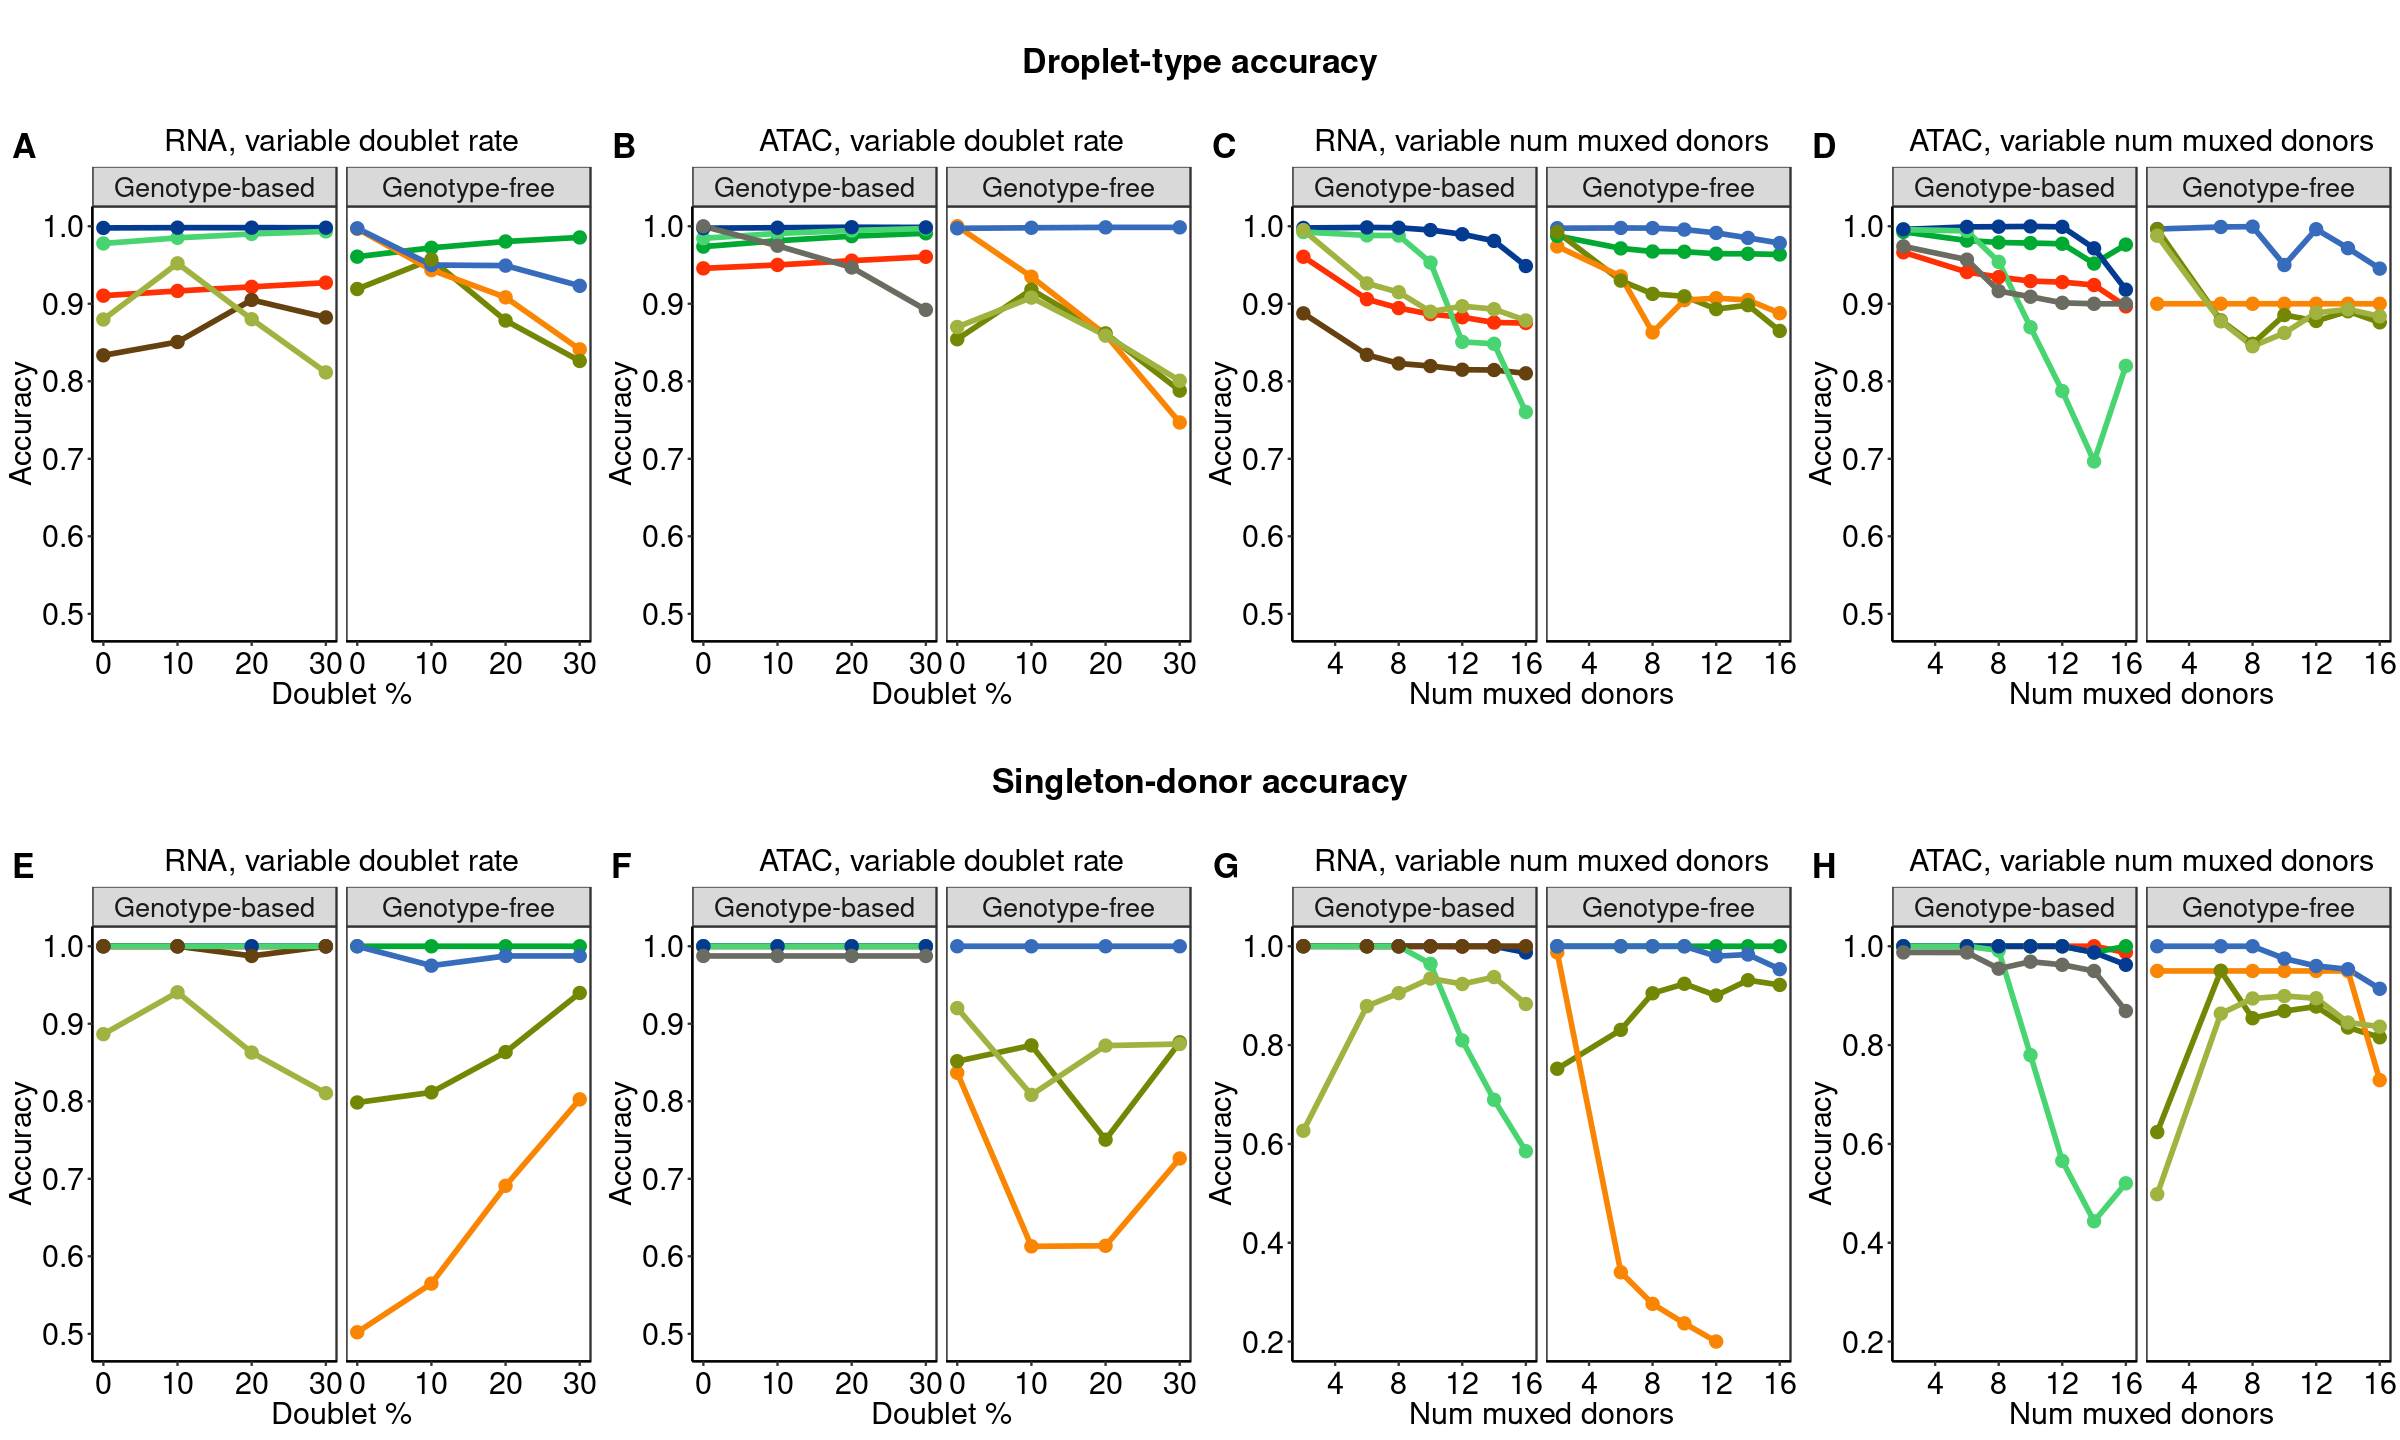

In [53]:
# First row of plots
prow1 <- plot_grid(p1, p2, p3, p4, labels = c('A', 'B', 'C', 'D'),
                   label_size = 20, nrow = 1)

# Second row of plots
prow2 <- plot_grid(p5, p6, p7, p8, labels = c('E', 'F', 'G', 'H'),
                   label_size = 20, nrow = 1)

# Combine the rows with a title in between
final_plot <- plot_grid(
  ggdraw() + draw_label("Droplet-type accuracy", fontface = 'bold', size = 20),
  prow1, 
  ggdraw() + draw_label("Singleton-donor accuracy", fontface = 'bold', size = 20),
  prow2,
  ncol = 1, rel_heights = c(0.2, 1, 0.2, 1)
)

# Adjust plot size
options(repr.plot.width=20, repr.plot.height=12)

# Show the final plot
print(final_plot)